In [1]:
#Out ouf the clasified contigs --> select for phylogenies.

#Picorna's
#Rhabdo's
#Sinai's + sinai recombinant
#Tymovirales
#Parvoviridae
#Totiviridae
#Partitiviridae
#Orthomyxoviridae

In [1]:
import pandas as pd
#import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
sns.set(font='arial')
sns.set_style("white")
sns.set_style("ticks")
%matplotlib inline

<Figure size 720x720 with 0 Axes>

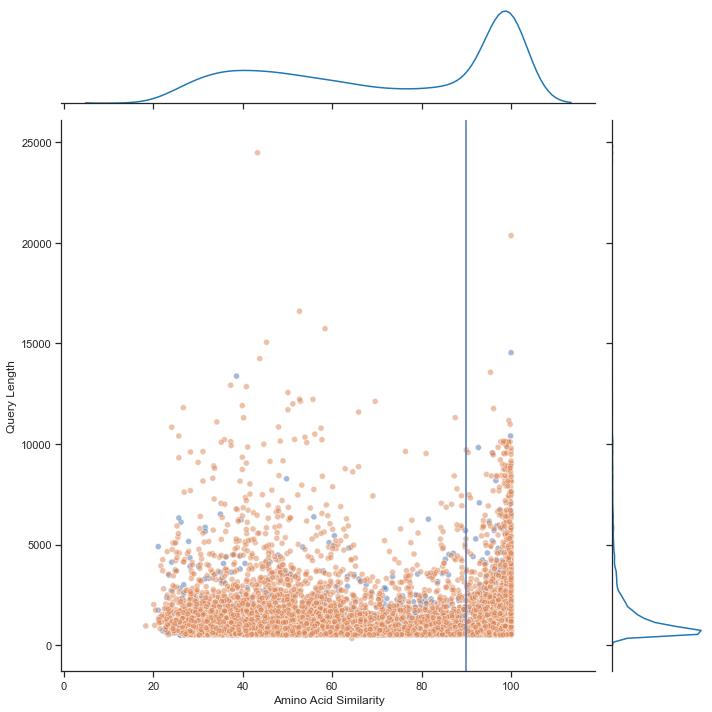

In [2]:
# First just plot the % protein ID's from the blast output (The clustered beevirs + sravirs):
m8parser = []
con_percprot_dic = {}
with open('../data/Beevir_sravir_cdhit9780.m8') as f:
    for line in f:
        contig = line.strip().replace('_Circ','').split('\t')[0]
        bit = float(line.strip().split('\t')[11])
        ref = line.strip().split('\t')[1]
        percid = float(line.strip().split('\t')[2])
        querylen = int(contig.split('_')[4])
        if 'NODE' in contig:
            origin = 'Bee'
        else:
            origin = 'SRA'
        if contig not in con_percprot_dic:
            con_percprot_dic[contig] = [ref,percid,bit,querylen, origin]
        else:
            if con_percprot_dic[contig][2] < bit:
                con_percprot_dic[contig] = [ref,percid,bit,querylen, origin]
percprot = pd.DataFrame(con_percprot_dic)
percprot = percprot.T
percprot.columns = ['Reference','Amino Acid Similarity','BitScore', 'Query Length', 'Origin']
plt.figure(figsize=(10,10))

grid = sns.JointGrid(x='Amino Acid Similarity', y='Query Length', data=percprot, height=10)
g = grid.plot_joint(sns.scatterplot, data=percprot, alpha=0.5,legend=False,hue='Origin')
g = plt.axvline(90, 0, 25000)
g = sns.kdeplot(percprot['Amino Acid Similarity'], ax=grid.ax_marg_x, legend=False, color='#1f77b4')
g = sns.kdeplot(percprot['Query Length'], ax=grid.ax_marg_y, vertical=True, legend=False, color='#1f77b4')
g
#g.figure.savefig('figures/SRA_BEE_viruses_percidentity.png', dpi=300)

In [3]:
len(percprot[percprot['Amino Acid Similarity'] < 90])/len(percprot)

0.5708042867547601

In [5]:
namedf = pd.read_csv("../data/notebooks_out/viral_df_taxonomy_SRA.csv",index_col=0)

In [6]:
#Picorna's
#Length > 5000:
picornas = []
for i in namedf[namedf['order'] == 'Picornavirales'].index:
    if int(i.split('_')[4]) > 5000:
        picornas.append(i)
#namedf[namedf.index.isin(picornas)]
#for i in picornas:
#    print(i)

In [7]:
#Rhabdo's
#Length > 10000:
rhabdos = []
for i in namedf[namedf['order'] == 'Mononegavirales'].index:
    if int(i.split('_')[4]) > 10000:
        rhabdos.append(i)
#for i in rhabdos:
#    print(i)

In [8]:
# Sinai
sinai = []
for i in namedf[namedf['genus'] == 'Sinaivirus'].index:
    if int(i.split('_')[4]) > 5500:
        sinai.append(i)
#for i in sinai:
#    print(i)

In [9]:
#tymovirales
tymo = []
for i in namedf[namedf['order'] == 'Tymovirales'].index:
    if int(i.split('_')[4]) > 5000:
        tymo.append(i)
#for i in tymo:
#    print(i)

In [10]:
#Totiviridae:
toti = []
for i in namedf[namedf['family'] == 'Totiviridae'].index:
    if int(i.split('_')[4]) > 5000:
        toti.append(i)
#for i in toti:
#    print(i)

In [11]:
#Partitiviridae:
partiti = []
for i in namedf[namedf['family'] == 'Partitiviridae'].index:
    if int(i.split('_')[4]) > 1500:
        partiti.append(i)
#for i in partiti:
#    print(i)

In [59]:
####################################################

In [12]:
#Bunya
bunya = []
for i in namedf[namedf['order'] == 'Bunyavirales'].index:
    if int(i.replace('_Circ','').split('_')[4]) > 5000:
        bunya.append(i)
#for i in bunya:
#    print(i)

In [ ]:
#AA% plots for specific groups

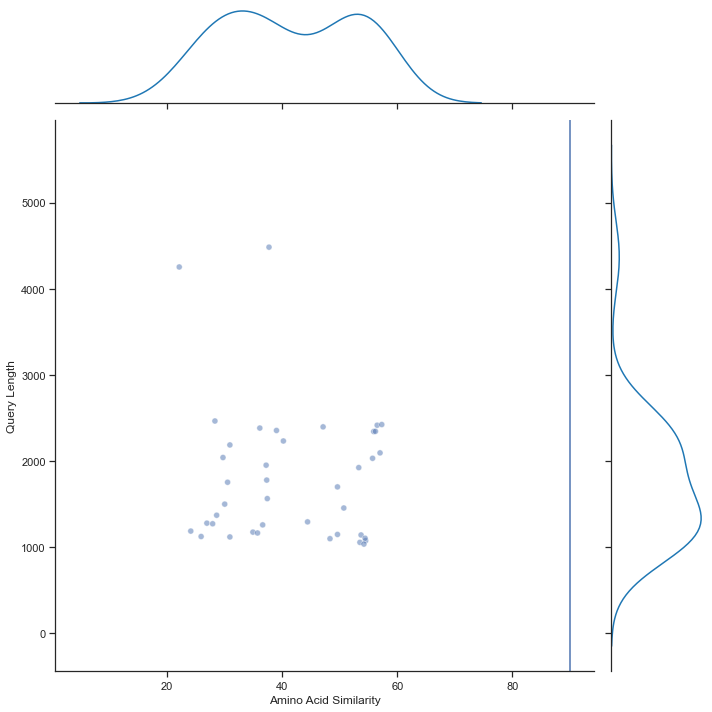

In [13]:
orthos = []
for i in namedf[namedf['family'] == 'Orthomyxoviridae'].index:
    if int(i.split('_')[4]) > 1000:
        orthos.append(i)
orthodf = percprot[percprot.index.isin(orthos)]

grid = sns.JointGrid(x='Amino Acid Similarity', y='Query Length', data=orthodf, height=10)
g = grid.plot_joint(sns.scatterplot, data=orthodf, alpha=0.5,legend=False,hue='Origin')
g = plt.axvline(90, 0, 25000)
g = sns.kdeplot(orthodf['Amino Acid Similarity'], ax=grid.ax_marg_x, legend=False, color='#1f77b4')
g = sns.kdeplot(orthodf['Query Length'], ax=grid.ax_marg_y, vertical=True, legend=False, color='#1f77b4')
g
#g.figure.savefig('figures/SRA_BEE_viruses_percidentity_orthomyxo.png', dpi=300)

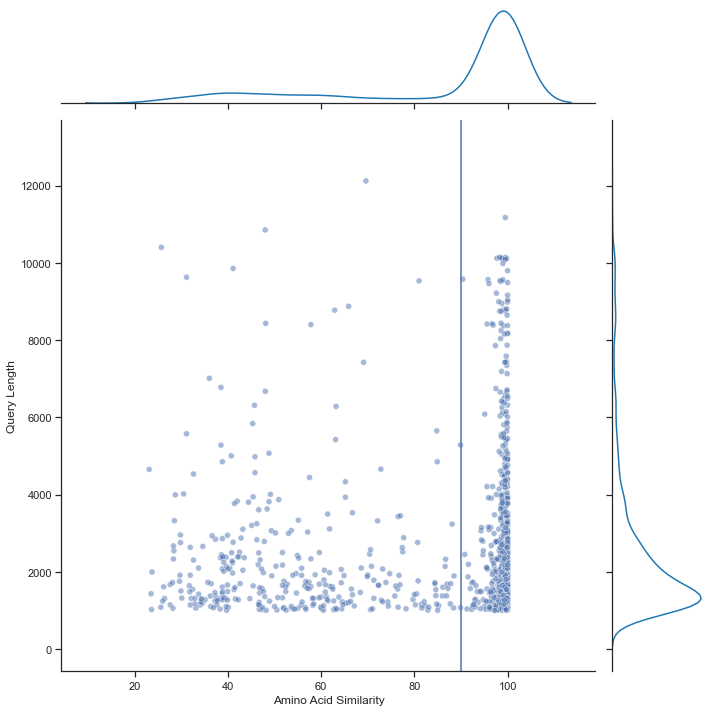

In [14]:
orthos = []
for i in namedf[namedf['order'] == 'Picornavirales'].index:
    if int(i.split('_')[4]) > 1000:
        orthos.append(i)
picornadf = percprot[percprot.index.isin(orthos)]

grid = sns.JointGrid(x='Amino Acid Similarity', y='Query Length', data=picornadf, height=10)
g = grid.plot_joint(sns.scatterplot, data=picornadf, alpha=0.5,legend=False,hue='Origin')
g = plt.axvline(90, 0, 25000)
g = sns.kdeplot(picornadf['Amino Acid Similarity'], ax=grid.ax_marg_x, legend=False, color='#1f77b4')
g = sns.kdeplot(picornadf['Query Length'], ax=grid.ax_marg_y, vertical=True, legend=False, color='#1f77b4')
g
#g.figure.savefig('figures/SRA_BEE_viruses_percidentity_picorna.png', dpi=300)

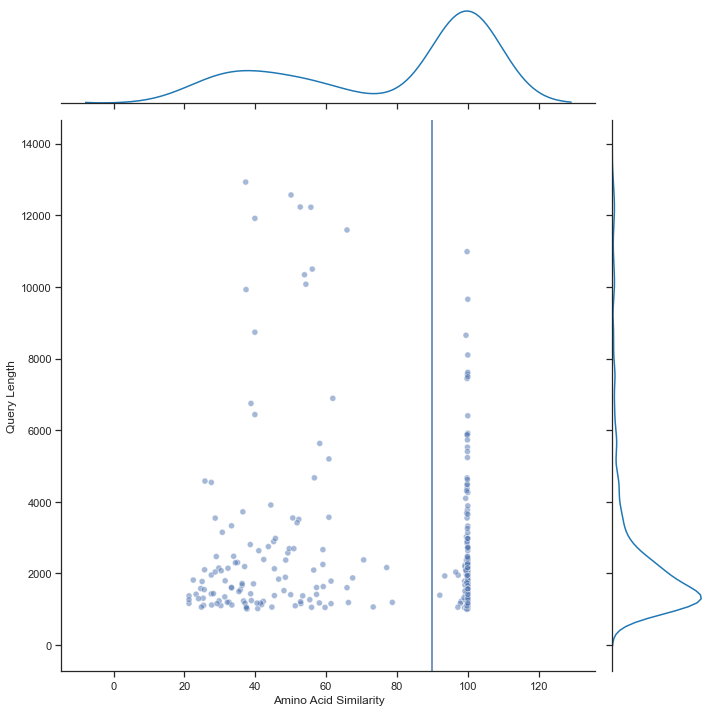

In [15]:
orthos = []
for i in namedf[namedf['order'] == 'Mononegavirales'].index:
    if int(i.split('_')[4]) > 1000:
        orthos.append(i)
rhabdodf = percprot[percprot.index.isin(orthos)]

grid = sns.JointGrid(x='Amino Acid Similarity', y='Query Length', data=rhabdodf, height=10)
g = grid.plot_joint(sns.scatterplot, data=rhabdodf, alpha=0.5,legend=False,hue='Origin')
g = plt.axvline(90, 0, 25000)
g = sns.kdeplot(rhabdodf['Amino Acid Similarity'], ax=grid.ax_marg_x, legend=False, color='#1f77b4')
g = sns.kdeplot(rhabdodf['Query Length'], ax=grid.ax_marg_y, vertical=True, legend=False, color='#1f77b4')
g
#g.figure.savefig('figures/SRA_BEE_viruses_percidentity_rhabdo.png', dpi=300)